In [1]:
import torch
import os
import torch.nn.functional as F
import numpy as np

In [2]:
def load_from_file(filename):
    return torch.load(filename, map_location=torch.device('cpu'))

In [20]:
torch.set_printoptions(threshold=10000000)

# load logits from file
src_logits = load_from_file('resources/tensors/DGCNN_CE_SR1/src_logits.pt')
tar1_logits = load_from_file('resources/tensors/DGCNN_CE_SR1/tar1_logits.pt')
tar2_logits = load_from_file('resources/tensors/DGCNN_CE_SR1/tar2_logits.pt')

# set OOD labels
tar1_labels = torch.from_numpy(np.full((1,len(tar1_logits)), 404)).squeeze().cpu()
tar2_labels = torch.from_numpy(np.full((1,len(tar2_logits)), 404)).squeeze().cpu()
src_labels = load_from_file('resources/tensors/DGCNN_CE_SR1/src_labels.pt')


src_MSP_scores, src_MSP_pred = F.softmax(src_logits, dim=1).max(1)
tar1_MSP_scores, tar1_MSP_pred = F.softmax(tar1_logits, dim=1).max(1)
tar2_MSP_scores, tar2_MSP_pred = F.softmax(tar2_logits, dim=1).max(1)



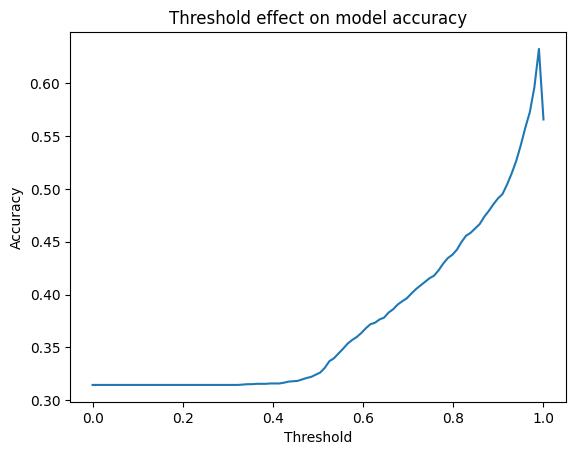

Best value for threshold: 0.98989898989899


In [31]:
import matplotlib.pyplot as plt

def accuracy(samples, labels, truth, threshold) -> float:
    acc = 0  #sum of all correct predictions
    i = 0    #number of iterations
    pred = 0 #temporary variable to store the prediction relative to the current sample
    for s in samples:
        if s > threshold:
            pred = labels[i]
        else:
            pred = 404
        if pred == truth[i]:
            acc += 1
        i += 1
    return acc/i

thresholds = np.linspace(0, 1, 100)
accuracies = []
samples = torch.hstack((src_MSP_scores, tar1_MSP_scores, tar2_MSP_scores))
labels = torch.hstack((src_MSP_pred, tar1_MSP_pred, tar2_MSP_pred))
truth = torch.hstack((src_labels, tar1_labels, tar2_labels))
for t in thresholds:
    accuracies.append(accuracy(samples, labels, truth, t))

plt.title('Threshold effect on model accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.plot(thresholds, accuracies)
plt.show()

print("Best value for threshold: " + str(thresholds[np.argmax(accuracies)]))